# 계층적 군집 연습문제
- kaggle customer 데이터셋 적용하여 계층적 군집 수행
> https://data.hossam.kr/G02//customer.xlsx

## 1. 패키지 참조

In [1]:
import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

## 2. 데이터 가져오기

In [2]:
origin = read_excel('https://data.hossam.kr/G02//customer.xlsx')
print(origin.info())
origin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객ID    200 non-null    int64 
 1   성별      200 non-null    object
 2   나이      200 non-null    int64 
 3   연수입     200 non-null    int64 
 4   지출점수    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,고객ID,성별,나이,연수입,지출점수
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 3. 데이터 전처리
### 1) 필요한 변수 추출

In [3]:
x = origin.filter(['연수입', '지출점수'])
x

,연수입,지출점수
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### 2) 데이터 표준화

In [4]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std[:5] # 상위 5데이터만 확인

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

### 3) 데이터 분포 확인(좋은 습관)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


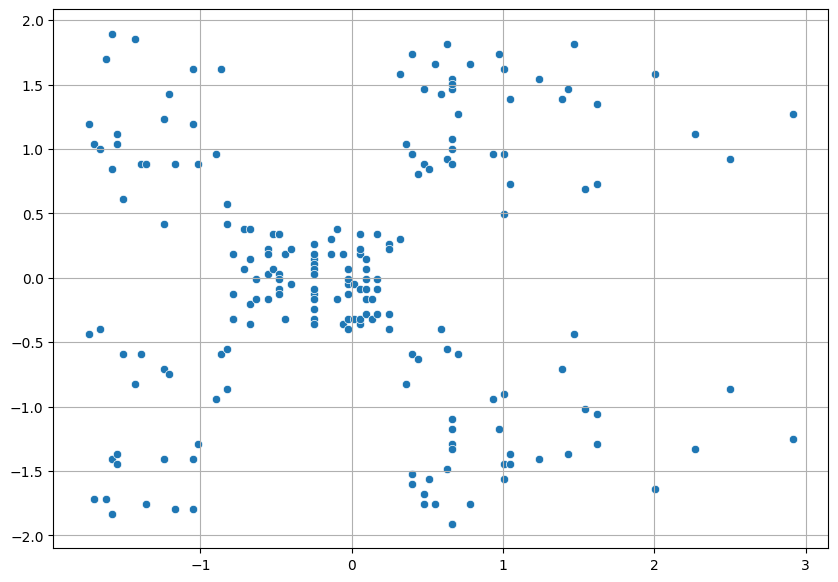

In [5]:
plt.figure(figsize = (10, 7))
sb.scatterplot(x = x_std[:, 0], y=x_std[:, 1])
plt.grid()
plt.show()
plt.close()
            

## 4. 계층 군집 수행
### 1) scipy 패키지 사용

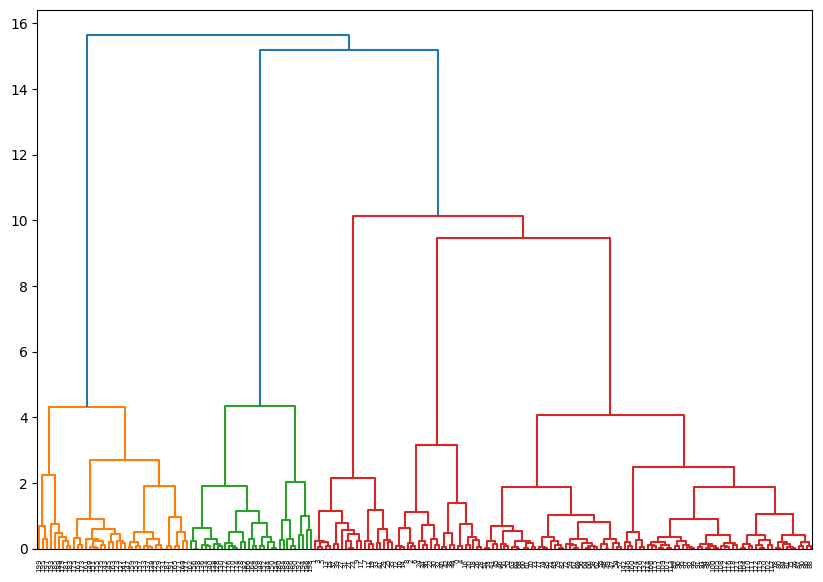

In [6]:
lnk = linkage(x_std, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(lnk, 
           show_leaf_counts = True)
plt.show()
plt.close()

## 4. sklearn 패키지 사용

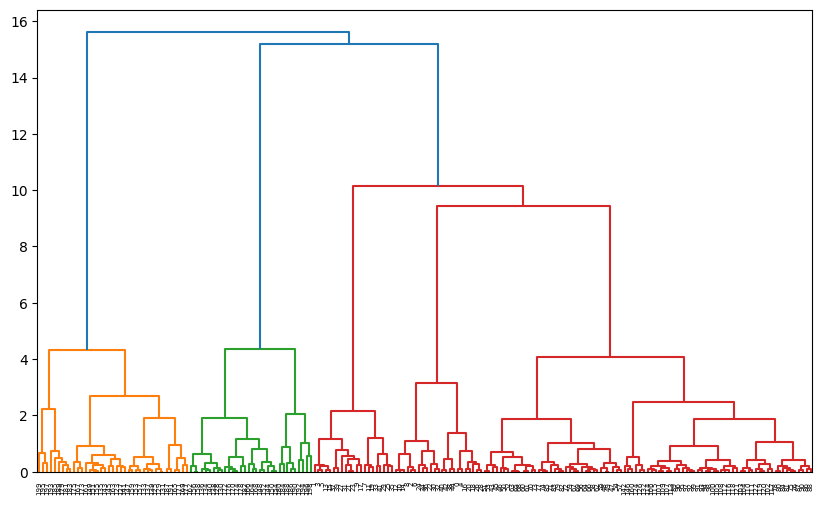

In [7]:
ac = AgglomerativeClustering(n_clusters = 2,
                              metric='euclidean',
                              linkage='ward',
                              compute_distances=True)
clustering = ac.fit(x_std)

counts = np.zeros(clustering.children_.shape[0])
n_samples = len(clustering.labels_)

for i, merge in enumerate(clustering.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [clustering.children_, clustering.distances_, counts]
    ).astype(float)

plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.show()
plt.close()